# In this notebook we will learn about Time Series Forecsting , Recurrent Predictor, Rolling Windows and LSTM on Windows.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df= pd.read_csv('cansim-0800020-eng-6674700030567901031.csv',
                 skiprows=6, skipfooter=9,
                 engine='python')

In [8]:
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [9]:
# convert Adjustments feature to index

from pandas.tseries.offsets import MonthEnd

In [11]:
df['Adjustments'] = pd.to_datetime(df['Adjustments'] ) + MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


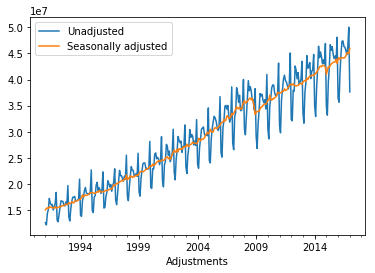

In [12]:
df.plot()

In [19]:
# Split data wrt  date

split_date = pd.Timestamp('01-01-2011')

In [20]:
train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]


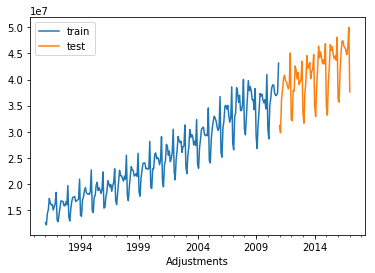

In [21]:
ax =train.plot()
test.plot(ax=ax)
plt.legend(['train','test']) 

#  the plot shows  blue colored line as training data and orange colored line as test set

In [22]:
# rescaling the data
# we fit and transform only our training data and only transform our test data (so you dont assume to know the scale of your test data)

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [23]:
train_sc[:4]  # new scaled datapoints

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795]])

In [24]:
# from above we see that each data learns from its previous data
# so, we take our training labels as  1+ the trainig data

X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [25]:
# creating a model with 1 i/p and 1 o/p (this is a regression problem)

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [26]:
K.clear_session()

model =Sequential()
model.add(Dense(12, input_dim=1 , activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [28]:
early_stop =EarlyStopping(monitor='loss',patience =1 ,verbose=1)


In [29]:
model.fit(X_train,y_train, epochs=200,
          batch_size=2, verbose=1,
          callbacks=[early_stop])

Epoch 1/200
239/239 [==============================] - 1s 3ms/step - loss: 0.4029
Epoch 2/200
239/239 [==============================] - 0s 1ms/step - loss: 0.1018
Epoch 3/200
239/239 [==============================] - 0s 978us/step - loss: 0.0454
Epoch 4/200
239/239 [==============================] - 0s 550us/step - loss: 0.0353
Epoch 5/200
239/239 [==============================] - 0s 583us/step - loss: 0.0308
Epoch 6/200
239/239 [==============================] - 0s 572us/step - loss: 0.0276
Epoch 7/200
239/239 [==============================] - 0s 610us/step - loss: 0.0250
Epoch 8/200
239/239 [==============================] - 0s 581us/step - loss: 0.0226
Epoch 9/200
239/239 [==============================] - 0s 583us/step - loss: 0.0206
Epoch 10/200
239/239 [==============================] - 0s 771us/step - loss: 0.0186
Epoch 11/200
239/239 [==============================] - 0s 1ms/step - loss: 0.0168
Epoch 12/200
239/239 [==============================] - 0s 619us/step - loss: 0.

In [30]:
y_pred = model.predict(X_test) 

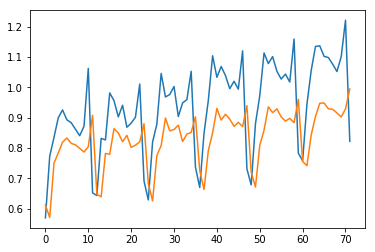

In [31]:
plt.plot(y_test)
plt.plot(y_pred)

In [32]:
# This model is not really good a its essentially repeating the input and will not predict the future correctly.

In [33]:
# so we make it better by using RECURRENT PREDICTOR


# RECURRENT PREDICTOR

In [34]:
from keras.layers import LSTM

# LSTM = Long Short Term Memory

In [35]:
X_train.shape

(239, 1)

In [36]:
# converting X_train to a tensor of order 3

X_train[:, None].shape

(239, 1, 1)

In [37]:
X_train_t = X_train[:,None]
X_test_t = X_test[:,None]

In [38]:
# Building Model

K.clear_session()

model = Sequential()
model.add(LSTM(6 , input_shape =(1,1) ))
model.add(Dense(1))
model.compile(loss ='mean_squared_error',optimizer='adam')

In [39]:
model.fit(X_train_t, y_train,
          epochs=100, batch_size=1, verbose=1,
          callbacks=[early_stop])

Epoch 1/100
239/239 [==============================] - 2s 8ms/step - loss: 0.1068
Epoch 2/100
239/239 [==============================] - 1s 2ms/step - loss: 0.0325
Epoch 3/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 4/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0207
Epoch 5/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 6/100
239/239 [==============================] - 1s 2ms/step - loss: 0.0138
Epoch 7/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0119
Epoch 8/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 9/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0105
Epoch 10/100
239/239 [==============================] - 1s 2ms/step - loss: 0.0103
Epoch 11/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0103
Epoch 00011: early stopping


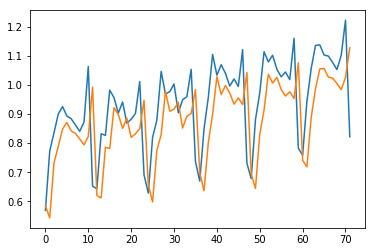

In [40]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

In [41]:
# this has done much better than previous model but not what we needed .
# so now we try using Windows approch.


# Windows

In [42]:
train_sc.shape

(240, 1)

In [43]:
# building a scled time series using shift function from pandas
    

train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [44]:
# ranging for 12 months

for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [46]:
test_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
2011-01-31,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-28,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-31,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-30,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-31,0.899933,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-30,0.925520,0.899933,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-31,0.893021,0.925520,0.899933,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-31,0.883631,0.893021,0.925520,0.899933,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN
2011-09-30,0.862208,0.883631,0.893021,0.925520,0.899933,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN


In [47]:
# dropping the NaN values from dataframe along with Scaled which is our target label
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [49]:
X_train.shape

(228, 12)

In [50]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [51]:
# building a fully connected  model

K.clear_session()

model =Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(X_train, y_train, epochs=200,
          batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/200
228/228 [==============================] - 1s 3ms/step - loss: 0.0103
Epoch 2/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 3/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 4/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 5/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 6/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 7/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 8/200
228/228 [==============================] - 0s 992us/step - loss: 0.0025
Epoch 9/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 10/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 11/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 12/200
228/228 [==============================] - 0s 967us/step - loss: 0.0015
Epoch 000

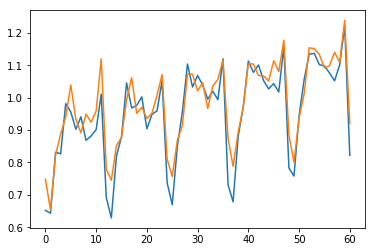

In [53]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)

# LSTM on windows


In [54]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 12)
X_test_t = X_test.reshape(X_test.shape[0], 1, 12)

In [55]:
X_train_t.shape

(228, 1, 12)

In [56]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 12)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6)                 456       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit(X_train_t, y_train, epochs=100,
          batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/100
228/228 [==============================] - 2s 9ms/step - loss: 0.0455
Epoch 2/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0100A: 0s - loss: 0.
Epoch 3/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0080
Epoch 4/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0074
Epoch 5/100
228/228 [==============================] - 1s 2ms/step - loss: 0.0067
Epoch 6/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0062
Epoch 7/100
228/228 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 8/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0051
Epoch 9/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 10/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0042
Epoch 11/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0035
Epoch 12/100
228/228 [==============================] - 1s 2ms/step - loss: 0.00

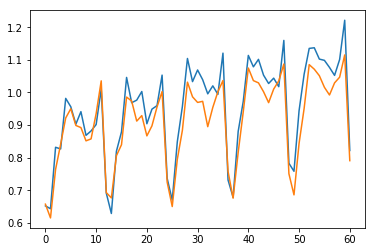

In [59]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)